# Streamlining workflows with pipelines

## 1. Loading the breast cancer wisconsin dataset
The dataset contains 569 samples of **malignant** and **benign** tumor cells. The first two columns in the dataset store the unique ID number of the samples and the corresponding diagnosis("M" for malignant, "B" for benign). The column 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuler.

1. Reading the dataset

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', 
                header=None)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


2. Assign the 30 features to a Numpy array x. Using `LabelEncoder`

In [2]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)

In [3]:
le.transform(['M', 'B'])

array([1, 0])

3. Divide the dataset into a separate training dataset($80%$) and a separate test dataset ($20%$)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=1)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


## 2. Combining transformers and estimators in a pipeline

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),
                   ('pca', PCA(n_components=2)),
                   ('clf', LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, y_train)
print("Test accuracy: %.3f" % pipe_lr.score(X_test, y_test))

Test accuracy: 0.947


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


# Using k-fold cross validation to assess model performance

In [6]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10)
scores = []
for k, (train, test) in enumerate(kfold.split(X_train, y_train)):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print("FOld: %s, Class dict.: %s Acc: %.3f" % (k+1, np.bincount(y_train[train]), score))

FOld: 1, Class dict.: [256 153] Acc: 0.913
FOld: 2, Class dict.: [256 153] Acc: 0.978
FOld: 3, Class dict.: [256 153] Acc: 0.978
FOld: 4, Class dict.: [256 153] Acc: 0.913
FOld: 5, Class dict.: [256 153] Acc: 0.935
FOld: 6, Class dict.: [257 153] Acc: 0.978
FOld: 7, Class dict.: [257 153] Acc: 0.933
FOld: 8, Class dict.: [257 153] Acc: 0.956
FOld: 9, Class dict.: [257 153] Acc: 0.978
FOld: 10, Class dict.: [257 153] Acc: 0.956


In [7]:
print("CV accuracy: %.3f + /- %.3f" % (np.mean(scores), np.std(scores)))

CV accuracy: 0.952 + /- 0.025


In [8]:
# Efficient k fold cross validation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=1)
print("CV accuracy scores: %s" % scores)

CV accuracy scores: [0.91304348 0.97826087 0.97826087 0.91304348 0.93478261 0.97777778
 0.93333333 0.95555556 0.97777778 0.95555556]


In [9]:
print("CV accuracy: %.3f + /- %.3f" % (np.mean(scores), np.std(scores)))

CV accuracy: 0.952 + /- 0.025


## Debugging algorithms with learning and validation curves

### Diagnosing bias and variance problems with learning curves

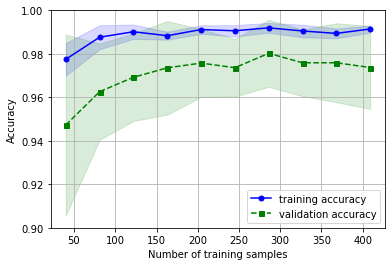

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
pipe_lr = Pipeline([
    ('scl', StandardScaler()),
    ('clf', LogisticRegression(penalty='l2', random_state=0))
])
train_sizes, train_scores, test_scores = \
    learning_curve(
        estimator=pipe_lr,
        X=X_train,
        y=y_train,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=10,
        n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean,
        color='blue', marker='o',
        markersize=5,
        label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.9, 1.0])
plt.show()

### Addressing overfitting and underfitting with validation curves

/home/jacob/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jacob/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

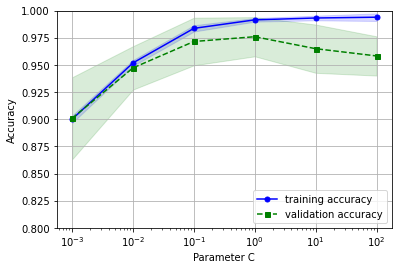

In [11]:
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

train_scores, test_scores = \
    validation_curve(
        estimator=pipe_lr,
        X=X_train,
        y=y_train,
        param_name='clf__C',
        param_range=param_range,
        cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5,
        label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(param_range, test_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

## Fine-tuning machine learning models via grid search

### Tuning hyper-parameters via grid search

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC(random_state=1))])
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,
              'clf__kernel': ['linear']},
             {'clf__C': param_range,
             'clf__gamma': param_range,
             'clf__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=10, n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9781159420289856
{'clf__C': 0.1, 'clf__kernel': 'linear'}


In [13]:
# estimate the performance of the best selected model
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print("Test accuracy: %.3f" % clf.score(X_test, y_test))

Test accuracy: 0.965


### Algorithm selection with nested cross-validation
In nested cross-validation, we have an outer k-fold cross-validation loop to split the data into training and test folds. And an inner loop is used to selected the model using k-fold cross
-validation on the taining fold.

In [14]:
gs = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=10, n_jobs=-1)

scores = cross_val_score(gs, X, y, scoring='accuracy', cv=5)
print(('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores))))

CV accuracy: 0.972 +/- 0.010


We can use the nested cross-validation approach to compare an SVM model to a simple decision tess classfier. For simplicity, we only tune its depth parameter

In [15]:
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                 param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                 scoring='accuracy',
                 cv=5)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=10)
print(('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores))))

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


CV accuracy: 0.948 +/- 0.038


## Looking at different performance evalutation metrics

### Reading a confusion matrix
A confusion matrix is simply a square matrix that reports the counts of the **true positive, true negative, false positive** and **false negative** prediction of a classfier, as shown in the following figure

![confusion matrix](./confusion_matrix.png)

In [18]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(conf_mat)

[[71  1]
 [ 2 40]]


map onto the confusion matrix illustration in the previous figure using matplotliv's `matshow` function

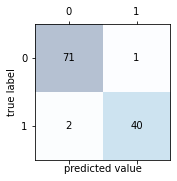

In [21]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i, s=conf_mat[i, j], va='center', ha='center')

plt.xlabel('predicted value')
plt.ylabel('true label')
plt.show()

### OPtimizing the precision and recall of a classification model
The prediction error(ERR) is defined as
$$
ERR= \frac{FP+FN}{FP_FN+TP+TN}
$$
and accuracy(ACC) is defined as
$$
ACC = \frac{TP+FN}{FP+FN+TP+TN}=1-ERR
$$
The **true positive rate(TRR)** and **false positive rate** are performance metrics that are especially useful for imbalanced class problems:
$$
FPR=\frac{FP}{FP+TN}=\frac{FP}{N}
$$
$$
TPR=\frac{TP}{FN+TP}=\frac{TP}{P}
$$
The **Precision(PRE)** and **recall(REC)** are performance metrics that are related to those true positive and true negative rates, and in fact, recall is synonymous to the true positive rate
$$
PRE=\frac{TP}{TP+FP}
$$
$$
REC=TPR=\frac{TP}{FN+TP}=\frac{TP}{P}
$$
In practice a combination of precisio and recall is used, which is known as **F1-score**:
$$
F1=2\frac{PRE\times REC}{PRE + REC}
$$

In [23]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Precision: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('Precision: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.976
Precision: 0.952
Precision: 0.964


In [26]:
# specify a different *positive label*
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score)
gs = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring=scorer,
                 cv=10)


In [27]:
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=10)
print(('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores))))

CV accuracy: 0.976 +/- 0.027


###  plotting a receiver operating characteristic
**Recivier operator characteristic(ROC)** graphs are useful tools for selecting models for classification based on their performance w.r.t. the false positive and true positive rates, which are computed by shifting the decision threshold of the classifer

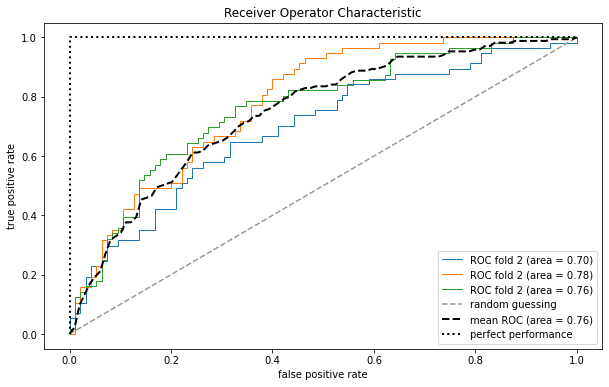

In [33]:
from sklearn.metrics import roc_curve, auc
from numpy import interp

X_train2 = X_train[:, [4, 14]]
kfold = StratifiedKFold(n_splits=3)

fig = plt.figure(figsize=(10, 6))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for k, (train, test) in enumerate(kfold.split(X_train, y_train)):
    probas = pipe_lr.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test], probas[:, 1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='random guessing')
mean_tpr /= kfold.get_n_splits()
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', label='mean ROC (area = %0.2f)' % roc_auc, lw=2)
plt.plot([0, 0, 1], [0, 1, 1], lw=2, linestyle=':', color='black', label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc='lower right')
plt.show()

we can just use `roc_auc_score` function for directly acessing ROC AUC score

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

pipe_svc = pipe_svc.fit(X_train2, y_train)
y_pred2 = pipe_svc.predict(X_test[:, [4, 14]])

print("ROC AUC: %.3f" % roc_auc_score(y_true=y_test, y_score=y_pred2))
print("Accuracy: %.3f" % accuracy_score(y_true=y_test, y_pred=y_pred2))

ROC AUC: 0.671
Accuracy: 0.728
